<a href="https://colab.research.google.com/github/ZungLV/AI/blob/main/W9_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

170498071/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [2]:
import matplotlib.pyplot as plt
import random

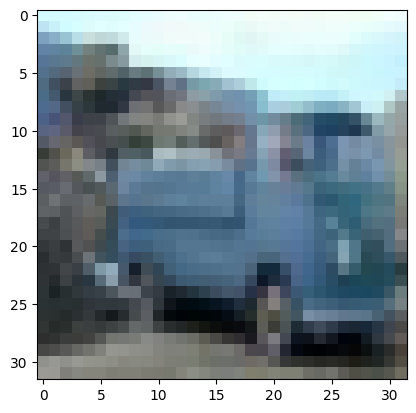

vat:  [9]


In [3]:
n=random.randint(0, 50000)
digit=x_train[n]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print('vat: ',y_train[n])


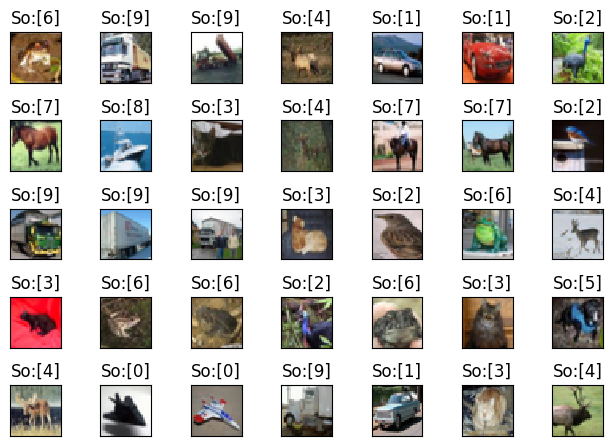

In [4]:
for i in range(35):
  plt.subplot(5,7,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='none')
  plt.title('So:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [5]:
from keras.models import Sequential
from keras.layers import Dense
model=Sequential()
model.add(Dense(10000,activation='relu',input_shape=(32*32*3,)))
model.add(Dense(8000,activation='relu'))
model.add(Dense(6000,activation='relu'))
model.add(Dense(4000,activation='relu'))
model.add(Dense(2000,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10000)             30730000  
                                                                 
 dense_1 (Dense)             (None, 8000)              80008000  
                                                                 
 dense_2 (Dense)             (None, 6000)              48006000  
                                                                 
 dense_3 (Dense)             (None, 4000)              24004000  
                                                                 
 dense_4 (Dense)             (None, 2000)              8002000   
                                                                 
 dense_5 (Dense)             (None, 1000)              2001000   
                                                                 
 dense_6 (Dense)             (None, 10)                1

In [6]:
X=x_test
Y=y_test

In [7]:
x_train =x_train.reshape(50000, 32*32*3)#ep thanh 1 hang
x_train=x_train.astype('float32')/255
x_test=x_test.reshape(10000, 32*32*3)
x_test=x_test.astype('float32')/255
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [8]:
from keras.utils import to_categorical
y_train=to_categorical(y_train,10)#keo lai kich thuoc
y_test=to_categorical(y_test,10)
y_train.shape


(50000, 10)

In [9]:
y_test.shape

(10000, 10)

In [18]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=128)
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Mat mat:',test_loss)
print('Do chinh sac:',test_acc)

Epoch 1/10
391/391 [==============================] - 24s 56ms/step - loss: 1.0192 - accuracy: 0.6571
Epoch 2/10
391/391 [==============================] - 22s 56ms/step - loss: 0.9642 - accuracy: 0.6731
Epoch 3/10
391/391 [==============================] - 21s 55ms/step - loss: 0.9333 - accuracy: 0.6847
Epoch 4/10
391/391 [==============================] - 21s 55ms/step - loss: 0.9045 - accuracy: 0.6949
Epoch 5/10
391/391 [==============================] - 22s 55ms/step - loss: 0.8813 - accuracy: 0.7039
Epoch 6/10
391/391 [==============================] - 22s 55ms/step - loss: 0.8611 - accuracy: 0.7165
Epoch 7/10
391/391 [==============================] - 22s 55ms/step - loss: 0.8214 - accuracy: 0.7266
Epoch 8/10
391/391 [==============================] - 21s 55ms/step - loss: 0.7882 - accuracy: 0.7407
Epoch 9/10
391/391 [==============================] - 22s 55ms/step - loss: 0.7354 - accuracy: 0.7555
Epoch 10/10
313/313 [==============================] - 2s 6ms/step - loss: 2.8068 

In [20]:
model.save('test1.h5')

1/1 [==============================] - 0s 79ms/step


array([4])

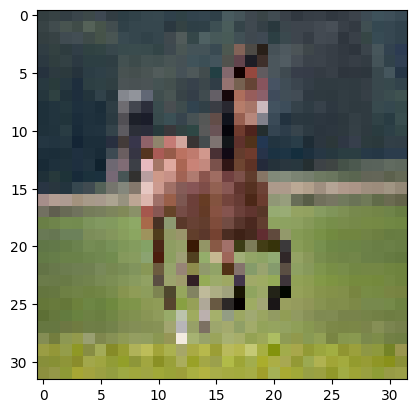

In [19]:
from keras.utils import load_img,img_to_array
import numpy as np
import matplotlib.pyplot as plt
img=load_img('anh2.jpg',target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,32*32*3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)